<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/Chapter%2009-3%20-%20LSTM%EA%B3%BC%20GRU%20%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM과 GRU 셀**

**키워드**

* LSTM: 셀은 타임스텝이 긴 데이터를 효과적으로 학습하기 위해 고안된 순환층이다.
<br> 입력 게이트, 삭제 게이트, 출력 게이트 역할을 하는 작은 셀이 포함되어 있다.

* 셀 상태: LSTM 셀은 은닉 상태 외에 셀 상태를 출력한다.
<br> 셀 상태는 다음 층으로 전달되지 않으며 현재 셀에서만 순환된다.

* GRU: 셀은 LSTM 셀의 간소화(경량화) 버전으로 생각할 수 있지만 LSTM 셀에 못지않는 성능을 낸다.

**핵심 패키지 및 함수**

* LSTM: LSTM 셀을 사용한 순환층 클래스이다.
<br> 첫 번째 매개변수에 뉴런의 개수를 지정한다.
<br> dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정할 수 있다.
<br> return_sequences 매개변수에서 모든 타임스텝의 은닉 상태를 출력할지 결정한다. 기본값은 False이다.

* GRU: GRU 셀을 사용한 순환층 클래스이다.
<br> 첫 번째 매개변수에 뉴런의 개수를 지정한다.
<br> dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정할 수 있다.
<br> return_sequences 매개변수에서 모든 타임스텝의 은닉 상태를 출력할지 결정한다. 기본값은 False이다.


In [ ]:
'''
이번 장에서는 고급 순환층인 LSTM과 GRU에 대해 알아볼 것이다.
이런 층들은 09-2장에서 배웠던 SimpleRNN보다 계산이 훨씬 복잡하다.
하지만 성능이 뛰어나기 때문에 순환 신경망에 많이 채택되고 있다.

일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다.
시퀀스가 갈수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문이다.
따라서 멀리 떨어져 있는 단어 정보를 인식하는 데 어려울 수 있다.
이를 위해 LSTM과 GRU 셀이 발명되었다.

이 장에서는 LSTM과 GRU 셀의 구조를 이해하고 텐서플로와 케라스를 사용해 다양한 순환 신경망 구조를 만들어 보겠다.
'''

'\n이번 장에서는 고급 순환층인 LSTM과 GRU에 대해 알아볼 것이다.\n이런 층들은 09-2장에서 배웠던 SimpleRNN보다 계산이 훨씬 복잡하다.\n하지만 성능이 뛰어나기 때문에 순환 신경망에 많이 채택되고 있다.\n\n일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다.\n시퀀스가 갈수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문이다.\n따라서 멀리 떨어져 있는 단어 정보를 인식하는 데 어려울 수 있다.\n이를 위해 LSTM과 GRU 셀이 발명되었다.\n\n이 장에서는 LSTM과 GRU 셀의 구조를 이해하고 텐서플로와 케라스를 사용해 다양한 순환 신경망 구조를 만들어 보겠다.\n'

# **LSTM 구조**

In [ ]:
'''
LSTM은 Long Short-Term Memory의 약자이다.
말 그대로 단기 기억을 오래 기억하기 위해 고안되었다.
LSTM은 구조가 복잡하므로 단계적으로 설명하겠다.
하지만 기본 개념은 동일하다.
LSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러 개 가지고 있다.
이런 계산 결과는 다음 타임스텝에 재사용된다.
이 과정을 하나씩 따라가 보자.

먼저 은닉 상태를 만드는 방법을 알아보자.
은닉 상태는 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만든다.
이때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용한다.
또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만든다.
이 값은 바로 다음 설명하겠다.

LSTM에는 순환되는 상태가 2개이다.
은닉 상태 말고 "셀 상태(cell state)"라고 부르는 값이 또 있죠.
은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값이다.

셀 상태를 계산하는 과정을 다음과 같다.
먼저 입력과 은닉 상태를 또 다른 가중치 W에 곱한 다음 시그모이드 함수를 통과시킨다.
그다음 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만든다.
이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여한다.

매우 복잡하다.
LSTM은 마치 작은 셀을 여러 개 포함하고 있는 큰 셀 같다.
중요한 것은 입력과 은닉 상태에 곱해지는 가중치 W1과 W2가 다르다는 점이다.
이 두 작은 셀은 각기 다른 기능을 위해 훈련된다.
그런데 LSTM 셀은 이게 끝이 아니다.

여기에 2개의 작은 셀이 더 추가되어 셀 상태를 만드는 데 기여한다.
이전과 마찬가지로 입ㄺ과 은닉 상태를 각기 다른 가중치에 곱한 다음,
하나는 시그모이드 함수를 통과시키고 다른 하나는 tanh 함수를 통과시킨다.
그다음 두 결과를 곱한 후 이전 셀 상태와 더한다.
이 결과가 최종적인 다음 셀 상태가 된다.
이렇게 LSTM에는 총 4개의 셀이 있다.
세 곳의 곱셈을 삭제 게이트, 입력 게이트, 출력 게이트라고 부른다.

삭제 게이트(forget gate)는 셀 상태에 있는 정보를 제거하는 역할을 하고
입력 게이트(input gate)는 새로운 정보를 셀 상태에 추가한다.
출력 게이트(output gate)를 통해서 이 셀 상태가 다음 은닉 상태로 출력된다.

물론 이 복잡한 셀 계산을 직접 할 필요는 없다.
케라스에는 이미 LSTM 클래스가 준비되어 있다.
다음 섹션에서 LSTM 클래스를 사용해 LSTM 순환 신경망을 만들어 보겠다.

글로만 보아선 이해가 쉽지 않지만,
중요한 것은 셀 상태는 LSTM의 출력으로 사용되는 것이 아니고, 셀 자체에서 순환되는 값이라는 것이다.
또한 은닉 상태이건 셀 상태이건 3개의 게이트이건 모두 벡터(vector) 값이다! (벡터는 숫자들을 담은 1차원 집합)
'''

'\nLSTM은 Long Short-Term Memory의 약자이다.\n말 그대로 단기 기억을 오래 기억하기 위해 고안되었다.\nLSTM은 구조가 복잡하므로 단계적으로 설명하겠다.\n하지만 기본 개념은 동일하다.\nLSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러 개 가지고 있다.\n이런 계산 결과는 다음 타임스텝에 재사용된다.\n이 과정을 하나씩 따라가 보자.\n\n먼저 은닉 상태를 만드는 방법을 알아보자.\n은닉 상태는 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만든다.\n이때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용한다.\n또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만든다.\n이 값은 바로 다음 설명하겠다.\n\nLSTM에는 순환되는 상태가 2개이다.\n은닉 상태 말고 "셀 상태(cell state)"라고 부르는 값이 또 있죠.\n은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값이다.\n\n셀 상태를 계산하는 과정을 다음과 같다.\n먼저 입력과 은닉 상태를 또 다른 가중치 W에 곱한 다음 시그모이드 함수를 통과시킨다.\n그다음 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만든다.\n이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여한다.\n\n매우 복잡하다.\nLSTM은 마치 작은 셀을 여러 개 포함하고 있는 큰 셀 같다.\n중요한 것은 입력과 은닉 상태에 곱해지는 가중치 W1과 W2가 다르다는 점이다.\n이 두 작은 셀은 각기 다른 기능을 위해 훈련된다.\n그런데 LSTM 셀은 이게 끝이 아니다.\n\n여기에 2개의 작은 셀이 더 추가되어 셀 상태를 만드는 데 기여한다.\n이전과 마찬가지로 입ㄺ과 은닉 상태를 각기 다른 가중치에 곱한 다음,\n하나는 시그모이드 함수를 통과시키고 다른 하나는 tanh 함수를 통과시킨다.\n그다음 두 결과를 곱한 후 이전 셀 

# **LSTM 구조**

* 1. gate 계산하기: Forget, Input, Output
* 2. cell state 업데이트 하기 (장기 정보)
* 3. hidden state 업데이트 하기 (단기 정보)
* 4. 최근 시점(hidden state)에서 예측하기 (y hat)

# **LSTM 신경망 훈련하기**

In [ ]:
# IMDB 리뷰 데이터 로드 및 세트 분할
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
# 샘플의 길이를 100으로 설정 후 패딩 지정
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
# LSTM 셀을 사용한 순환층 생성
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# SimpleRNN 클래스를 LSTM 클래스로 바꾸기만 하면 됨

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 모델 구조 출력
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
SimpleRNN 클래스의 모델 파라미터 개수는 200개였다.
LSTM 셀에서는 작은 셀이 4개 있으므로 정확도가 4배가 늘어 모델 파라미터 개수는 800개가 되었다.

모델을 컴파일하고 훈련해 보겠다.
이전과 마찬가지로 배치 크기는 64개, 에포크 횟수는 100으로 지정한다.
체크포인트와 조기 종료를 위한 코드도 동일하다.
'''

'\nSimpleRNN 클래스의 모델 파라미터 개수는 200개였다.\nLSTM 셀에서는 작은 셀이 4개 있으므로 정확도가 4배가 늘어 모델 파라미터 개수는 800개가 되었다.\n\n모델을 컴파일하고 훈련해 보겠다.\n이전과 마찬가지로 배치 크기는 64개, 에포크 횟수는 100으로 지정한다.\n체크포인트와 조기 종료를 위한 코드도 동일하다.\n'

In [ ]:
# 모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.5144 - loss: 0.6930 - val_accuracy: 0.5768 - val_loss: 0.6921
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5834 - loss: 0.6917 - val_accuracy: 0.6126 - val_loss: 0.6903
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.6128 - loss: 0.6895 - val_accuracy: 0.6356 - val_loss: 0.6863
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.6395 - loss: 0.6843 - val_accuracy: 0.6520 - val_loss: 0.6752
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.6557 - loss: 0.6670 - val_accuracy: 0.7066 - val_loss: 0.6175
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.7148 - loss: 0.6092 - val_accuracy: 0.7306 - val_loss: 0.5893
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.7351 - loss: 0.5830 - val_accuracy: 0.7464 - val_loss: 0.5708
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7480 - loss: 0

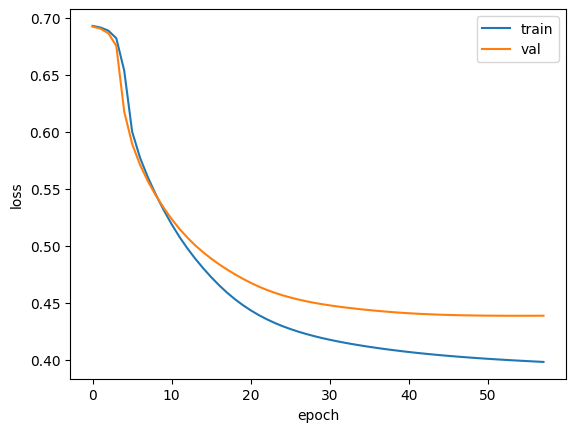

In [ ]:
# 훈련 손실과 검증 손실 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
LSTM 층에 적용한 드롭아웃이 효과를 발휘한 것 같다.
훈련 손실과 검증 손실 간의 차이가 좁혀진 것을 확인할 수 있다.

밀집층이나 합성곱 층처럼 순환층도 여러 개를 쌓지 않을 이유가 없다.
다음 섹션에서 2개의 손환층을 연결한 모델을 훈련해 보자.
'''

'\nLSTM 층에 적용한 드롭아웃이 효과를 발휘한 것 같다.\n훈련 손실과 검증 손실 간의 차이가 좁혀진 것을 확인할 수 있다.\n\n밀집층이나 합성곱 층처럼 순환층도 여러 개를 쌓지 않을 이유가 없다.\n다음 섹션에서 2개의 손환층을 연결한 모델을 훈련해 보자.\n'

# **2개의 층을 연결하기**

In [ ]:
'''
순환층을 연결할 때는 한 가지 주의 사항이 있다.
앞서 언급했지만 순환층의 은닉 상태는
샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달한다.
하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요하다.
따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야 한다.
오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 한다.
09-1절에서 떠올렸던 순환층 그림을 기억하자.

케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면
마지막을 제외한 다른 모든 순환층에서
return_sequences 매개변수를 True로 지정하면 된다.
'''

'\n순환층을 연결할 때는 한 가지 주의 사항이 있다.\n앞서 언급했지만 순환층의 은닉 상태는 \n샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달한다.\n하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요하다.\n따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야 한다.\n오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 한다.\n09-1절에서 떠올렸던 순환층 그림을 기억하자.\n\n케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면\n마지막을 제외한 다른 모든 순환층에서\nreturn_sequences 매개변수를 True로 지정하면 된다.\n'

In [ ]:
# LSTM 층 연결하기
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
'''
2개의 LSTM 층을 쌓았고 모두 드롭아웃을 0.3으로 지정했다.
그리고 첫 번째 LSTM 클래스에서는 return_sequences 매개변수를 True로 지정했다.
summary() 메서드의 결과를 확인해 보자.
'''

'\n2개의 LSTM 층을 쌓았고 모두 드롭아웃을 0.3으로 지정했다.\n그리고 첫 번째 LSTM 클래스에서는 return_sequences 매개변수를 True로 지정했다.\nsummary() 메서드의 결과를 확인해 보자.\n'

In [ ]:
# 모델 구조 출력
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
첫 번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에
출력 크기가 (None, 100, 8)로 표시되었다.
이에 반해 두 번째 LSTM 층의 출력 크기는
마지막 타임스텝의 은닉 상태만 출력하기에 (None, 8)이다.

이 모델을 훈련해 보겠다.
'''

'\n첫 번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에\n출력 크기가 (None, 100, 8)로 표시되었다.\n이에 반해 두 번째 LSTM 층의 출력 크기는 \n마지막 타임스텝의 은닉 상태만 출력하기에 (None, 8)이다.\n\n이 모델을 훈련해 보겠다.\n'

In [ ]:
# 새로운 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.5030 - loss: 0.6931 - val_accuracy: 0.5038 - val_loss: 0.6930
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5327 - loss: 0.6928 - val_accuracy: 0.5356 - val_loss: 0.6925
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.5551 - loss: 0.6920 - val_accuracy: 0.6112 - val_loss: 0.6910
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.5831 - loss: 0.6902 - val_accuracy: 0.6440 - val_loss: 0.6857
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.6289 - loss: 0.6817 - val_accuracy: 0.6716 - val_loss: 0.6567
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.6645 - loss: 0.6394 - val_accuracy: 0.7052 - val_loss: 0.5768
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.7028 - loss: 0.5786 - val_accuracy: 0.7292 - val_loss: 0.5459
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.7279 - loss: 0

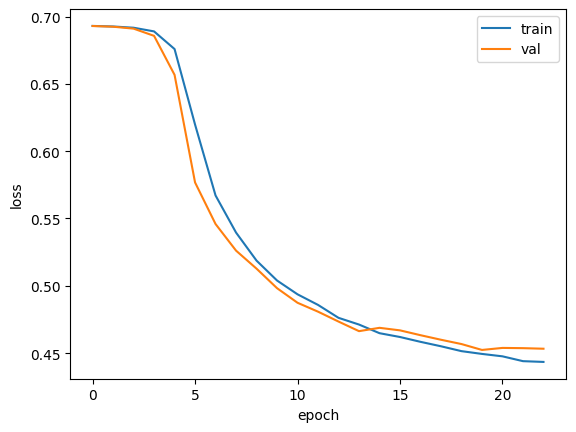

In [ ]:
# 훈련 손실 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
그래프를 보면 과대적합을 제어하면서 손실을 최대한 낮춘 것 같다.
지금까지 LSTM 셀을 사용한 훈련과 드롭아웃을 적용해 보았고
2개의 층을 쌓은 순환 신경망을 만들어 보았다.
다음 섹션에서는 유명한 또 다른 셀인 GRU 셀에 대해 알아보겠다.
'''

'\n그래프를 보면 과대적합을 제어하면서 손실을 최대한 낮춘 것 같다.\n지금까지 LSTM 셀을 사용한 훈련과 드롭아웃을 적용해 보았고\n2개의 층을 쌓은 순환 신경망을 만들어 보았다.\n다음 섹션에서는 유명한 또 다른 셀인 GRU 셀에 대해 알아보겠다.\n'

# **GRU 구조**

In [ ]:
'''
GRU는 Gated Recurrent Unit의 약자이다.
이 셀은 LSTM을 간소화(경량화)한 버전으로 생각할 수 있다.
이 셀은 LSTM처럼 셀 상태를 계산하지 않고 은닉 상태만 포함하고 있다.

GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어 있다.
2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용한다.

맨 왼쪽에서 Wz를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행한다.
이와 똑같은 출력을 1에서 뺀 다음에 가장 오른쪽 Wg를 사용하는 셀의 출력에 곱한다.
이는 입력되는 정보(과거 정보)를 제어하는 역할을 수행한다.
가운데 Wr을 사용하는 셀에서 출력된 값은 Wg 셀이 사용할 은닉 상태의 정보를 제어한다.

쉽게 말해 LSTM의 삭제 게이트, 입력 게이트를 "update gate"로 통합하고,
출력 게이트를 없애고 "reset gate"로 정의했다.
또한, 셀 상태, 은닉 상태를 은닉 상태(hidden state) 하나로 통합했다.

GRU 셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않은 좋은 성능을 낸다.
다음 섹션에서 GRU 셀을 사용한 순환 신경망을 만들어 보겠다.
'''

'\nGRU는 Gated Recurrent Unit의 약자이다.\n이 셀은 LSTM을 간소화한 버전으로 생각할 수 있다.\n이 셀은 LSTM처럼 셀 상태를 계산하지 않고 은닉 상태만 포함하고 있다.\n\nGRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어 있다.\n2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용한다.\n\n맨 왼쪽에서 Wz를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행한다.\n이와 똑같은 출력을 1에서 뺀 다음에 가장 오른쪽 Wg를 사용하는 셀의 출력에 곱한다.\n이는 입력되는 정보를 제어하는 역할을 수행한다.\n가운데 Wr을 사용하는 셀에서 출력된 값은 Wg 셀이 사용할 은닉 상태의 정보를 제어한다.\n\nGRU 셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않은 좋은 성능을 낸다.\n다음 섹션에서 GRU 셀을 사용한 순환 신경망을 만들어 보겠다.\n'

# **GRU 신경망 훈련하기**

In [ ]:
# GRU 모델 생성 및 구조 출력
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

# LSTM 클래스를 GRU 클래스로 바뀐 것 외에는 동일함

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
GRU 층의 모델 파라미터 개수를 계산해 보겠다.
GRU 셀에는 3개의 작은 셀이 있다.
작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.
입력에 곱하는 가중치는 16 * 8 = 128개이고
은닉 상태에 곱하는 가중치는 8 * * = 64개이다.
그리고 절편은 뉴런마다 하나씩이므로 8개이다.
모두 더하면 128 + 64 * 8 = 200개이다.
이런 작은 셀이 3개이므로 모두 600개(*3)의 모델 파라미터가 필요하다.
그런데 summary() 메서드를 통해 확인한 파라미터 개수는 624개이다.
무엇이 잘못되었을까?

은닉 상태가 먼저 가중치과 곱해진 다음 가운데 셀의 출력과 곱해진다.
그래서 이전에는 입력과 은닉 상태에 곱해지는 가중치를 하나로 표기했는데, 이번에는 둘로 나눴다.

이렇게 계산하면 은닉 상태에 곱해지는 가중치 외에 절편이 별도로 필요하다.
따라서 작은 셀마다 하나씩 절편이 추가되고 8개의 뉴런이 있으므로 총 24개의 모델 파라미터가 더해진다.
따라서 GRU 층의 총 모델 파라미터 개수는 624개가 된다.

그럼 GRU 셀을 사용한 순환 신경망을 훈련해 보자.
역시 방법은 이전과 동일하다.
'''

'\nGRU 층의 모델 파라미터 개수를 계산해 보겠다.\nGRU 셀에는 3개의 작은 셀이 있다.\n작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.\n입력에 곱하는 가중치는 16 * 8 = 128개이고\n은닉 상태에 곱하는 가중치는 8 * * = 64개이다.\n그리고 절편은 뉴런마다 하나씩이므로 8개이다.\n모두 더하면 128 + 64 * 8 = 200개이다.\n이런 작은 셀이 3개이므로 모두 600개(*3)의 모델 파라미터가 필요하다.\n그런데 summary() 메서드를 통해 확인한 파라미터 개수는 624개이다.\n무엇이 잘못되었을까?\n\n은닉 상태가 먼저 가중치과 곱해진 다음 가운데 셀의 출력과 곱해진다.\n그래서 이전에는 입력과 은닉 상태에 곱해지는 가중치를 하나로 표기했는데, 이번에는 둘로 나눴다.\n\n이렇게 계산하면 은닉 상태에 곱해지는 가중치 외에 절편이 별도로 필요하다.\n따라서 작은 셀마다 하나씩 절편이 추가되고 8개의 뉴런이 있으므로 총 24개의 모델 파라미터가 더해진다.\n따라서 GRU 층의 총 모델 파라미터 개수는 624개가 된다.\n\n그럼 GRU 셀을 사용한 순환 신경망을 훈련해 보자.\n역시 방법은 이전과 동일하다.\n'

In [ ]:
# GRU 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.5090 - loss: 0.6930 - val_accuracy: 0.5592 - val_loss: 0.6918
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.5693 - loss: 0.6911 - val_accuracy: 0.5684 - val_loss: 0.6895
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5912 - loss: 0.6883 - val_accuracy: 0.5854 - val_loss: 0.6858
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.6078 - loss: 0.6836 - val_accuracy: 0.6046 - val_loss: 0.6792
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.6258 - loss: 0.6753 - val_accuracy: 0.6282 - val_loss: 0.6672
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.6451 - loss: 0.6599 - val_accuracy: 0.6552 - val_loss: 0.6424
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.6807 - loss: 0.6253 - val_accuracy: 0.7124 - val_loss: 0.5752
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.7268 - loss: 0

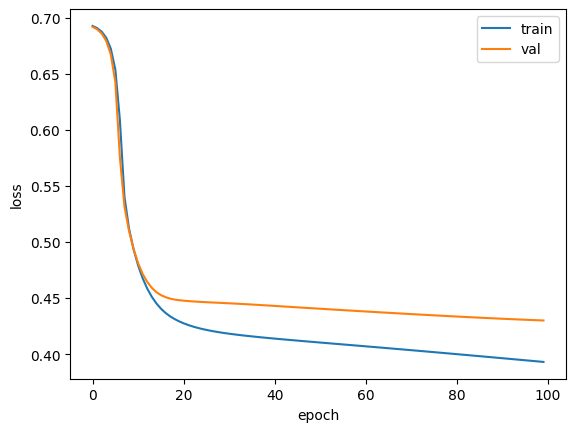

In [ ]:
# 훈련 손실 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
드롭아웃을 사용하지 않았기 때문에 이전보다 훈련 손실과 검증 손실 사이에 차이가 있지만
훈련 과정이 잘 수렴되고 있는 것을 확인할 수 있다.
순환 신경망에서 가장 인기 있는 LSTM과 GRU 셀을 사용해 성공적으로 훈련시켰다.
'''

'\n드롭아웃을 사용하지 않았기 때문에 이전보다 훈련 손실과 검증 손실 사이에 차이가 있지만\n훈련 과정이 잘 수렴되고 있는 것을 확인할 수 있다.\n순환 신경망에서 가장 인기 있는 LSTM과 GRU 셀을 사용해 성공적으로 훈련시켰다.\n'

In [ ]:
# 2개의 순환층을 쌓은 모델 테스트 성능 확인
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.keras')

rnn_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7910 - loss: 0.4510


[0.4513796865940094, 0.7897199988365173]

In [ ]:
'''
이 모델은 드롭아웃을 적용하여 과대 적합을 잘 억제 했기에
테스트 세트의 성능이 검증 세트와 크게 차이 나지 않는다.
성공적이다.
이제 댓글을 긍정과 부정으로 분류할 수 있다.
'''

'\n이 모델은 드롭아웃을 적용하여 과대 적합을 잘 억제 했기에\n테스트 세트의 성능이 검증 세트와 크게 차이 나지 않는다.\n성공적이다.\n이제 댓글을 긍정과 부정으로 분류할 수 있다.\n'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# IMDB 데이터셋 로드
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

# 훈련 데이터와 검증 데이터 분리
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

# 훈련 데이터 전처리
train_seq = pad_sequences(train_input, maxlen=100)

# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model.add(keras.layers.LSTM(8, dropout=0.3))  # LSTM 층 추가
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(train_seq, train_target, epochs=10, batch_size=64, validation_data=(val_seq, val_target))  # 에포크 수 조정

# 리뷰 입력 받기
review = input("리뷰를 입력하세요: ")

# 리뷰 전처리
# 이전 훈련 데이터와 동일한 전처리 과정 (토큰화, 정수 인코딩, 패딩) 적용
word_index = imdb.get_word_index()  # IMDB 단어 사전 로드
review_seq = [word_index.get(word, 0) + 3 for word in review.split()]  # 단어를 숫자로 변환
review_seq = pad_sequences([review_seq], maxlen=100)  # 패딩 추가

# 예측
prediction = model.predict(review_seq)

# 결과 출력
if prediction[0][0] > 0.5:
    print("긍정적인 리뷰입니다.")
else:
    print("부정적인 리뷰입니다.")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.5968 - loss: 0.6481 - val_accuracy: 0.7820 - val_loss: 0.4637
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.7760 - loss: 0.4789 - val_accuracy: 0.7882 - val_loss: 0.4512
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7886 - loss: 0.4515 - val_accuracy: 0.7968 - val_loss: 0.4385
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.7951 - loss: 0.4356 - val_accuracy: 0.7942 - val_loss: 0.4366
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8027 - loss: 0.4247 - val_accuracy: 0.7936 - val_loss: 0.4430
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.8049 - loss: 0.4200 - val_accuracy: 0.7914 - val_loss: 0.4444
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.8062 - loss: 0.4164 - val_accuracy: 0.7974 - val_loss: 0.4348
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.8052 - loss: 0.4119 - 